In [1]:
#import block
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from glob import glob
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from re import findall as find
import seaborn as sns

In [3]:
csvfile="H:/PHD_data/Imaging_et_analysis/Stellaris/2024/06_Juni/AspAnalysis_2024_Figure5.xlsx"
sumdf = pd.read_excel(csvfile)
sumdf.drop(index=[13,14],inplace=True)
sumdf.columns

Index(['expid', 'Pre', 'Post', 'Sampleid', 'Area'], dtype='object')

In [4]:
sumdf

,expid,Pre,Post,Sampleid,Area
0,190423_09,740.745,1413.918,Control,NaN
1,190423_10,740.005,1721.121,Control,NaN
2,190423_01,466.173,761.648,MO,NaN
3,190423_02,291.343,460.810,MO,403443.000
4,190423_08,341.414,572.942,MO,718794.000
5,050624_01,1612.372,3360.107,Control,1583.676
6,050624_05,1893.700,3217.710,Control,1035.082
7,050624_06,1321.944,2437.917,Control,178.551
8,060624_00,844.875,991.902,MO,140020.000
9,060624_01,1001.590,1598.746,MO,140020.000


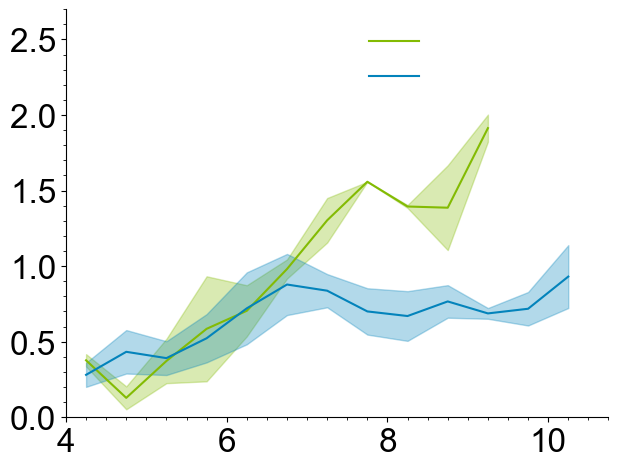

In [6]:
yslmospeedcsv="H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure5/YSLMOspeed/YSLK4K8MOSpeedData.csv"
yslmospeeddf = pd.read_csv(yslmospeedcsv)
controlyslcolumns=[]
yslcolumns=[]
for colums in yslmospeeddf.columns[1:]:
    if "control" in colums:
        controlyslcolumns.append(colums)
    else:
        yslcolumns.append(colums)
controlyslmean=yslmospeeddf[controlyslcolumns].mean(axis=1)
controlyslsem=yslmospeeddf[controlyslcolumns].sem(axis=1)
yslmean=yslmospeeddf[yslcolumns].mean(axis=1)
yslsem=yslmospeeddf[yslcolumns].sem(axis=1)

fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
ax.set_xlim([4,10.5])
ax.xaxis.set_ticks(np.arange(4, 11, 0.25),minor=True)
ax.set_ylim(0,2.5)
ax.set_yticks(np.arange(0,2.75,0.1),minor=True)
ax.plot(yslmospeeddf["Time (hpf)"][:-2],controlyslmean[:-2],color='#83bb03',label="                  ")
ax.fill_between(yslmospeeddf["Time (hpf)"],controlyslmean-controlyslsem,controlyslmean+controlyslsem,alpha=0.3,color='#83bb03')
ax.plot(yslmospeeddf["Time (hpf)"],yslmean,color='#0383bb',label="                     ")
ax.fill_between(yslmospeeddf["Time (hpf)"],yslmean-yslsem,yslmean+yslsem,alpha=0.3,color='#0383bb')
#plt.xlabel("Time (hpf)")
#plt.ylabel("Speed (µm/min)")
plt.legend(loc="upper right",frameon=False,fontsize=18)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure5/YSLMOspeed/YSLK4K8MOSpeed.png",dpi=900,bbox_inches='tight',transparent=True,format='png')
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure5/YSLMOspeed/YSLK4K8MOSpeed.svg",dpi=900,bbox_inches='tight',transparent=True,format='svg')
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure5/YSLMOspeed/YSLK4K8MOSpeed.pdf",dpi=900,bbox_inches='tight',transparent=True,format='pdf')
plt.show()

In [7]:
yslmospeeddf

,Time (hpf),control_08032023_Pos001,control_08032023_Pos002,ysl_08032023_Pos003,ysl_08032023_Pos004,ysl_08032023_Pos005
0,4.25,0.336325,0.417599,0.169228,0.435592,0.237633
1,4.75,0.204312,0.052748,0.152957,0.516620,0.629821
2,5.25,0.225692,0.519202,0.431275,0.180772,0.561881
3,5.75,0.237879,0.932702,0.403541,0.325874,0.838969
4,6.25,0.535541,0.873506,1.053213,0.259792,0.849516
5,6.75,0.917579,1.044100,0.791098,0.579901,1.264150
6,7.25,1.155922,1.450442,0.700466,0.757080,1.054825
7,7.75,1.558138,1.558384,0.404197,0.779089,0.917661
8,8.25,1.384893,1.404047,0.352719,0.753364,0.903562
9,8.75,1.106152,1.666954,0.586868,0.959384,0.753023


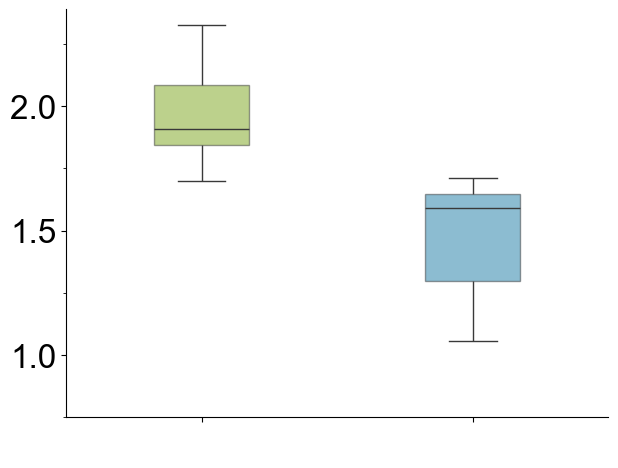

In [20]:

#figure box plot and save data as a csv with headings as the experiment name
fig,ax=plt.subplots(figsize=(7, 5.3),sharey=True)
labels=["     ","            "]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
colors=["#83bb03","#0383bb"]
bplot = sns.boxplot(data=sumdf, x="Sampleid", y=sumdf["Post"]/sumdf["Pre"],hue="Sampleid", palette=colors, width=0.35,boxprops=dict(alpha=0.5),legend="auto")
# Plot the distribution of values as a scatter on top of the boxplots
#sns.stripplot(data=sumdf, x="Sampleid", y=sumdf["Post"]/sumdf["Pre"], color="black", size=5)
plt.xticks([0, 1], labels=labels)
# Add labels and title
plt.xlabel(None)
plt.ylabel(None)
#plt.title("Distribution of Post/Pre Ratio")

ax.yaxis.set_ticks(np.arange(0.75, 2.5, 0.25),minor=True)
plt.savefig("B:/home/PHD_data/Imaging_et_analysis/PaperFigures/Figure5/YSLalignment/FlowAlignment.svg",transparent=True,bbox_inches='tight',dpi=300)
plt.savefig("B:/home/PHD_data/Imaging_et_analysis/PaperFigures/Figure5/YSLalignment/FlowAlignment.png",transparent=True,bbox_inches='tight',dpi=300)
plt.savefig("B:/home/PHD_data/Imaging_et_analysis/PaperFigures/Figure5/YSLalignment/FlowAlignment.pdf",transparent=True,bbox_inches='tight',dpi=300)
# Show the plot
plt.show()


In [8]:
csvbox="H:/PHD_data/Imaging_et_analysis/Stellaris/2024/06_Juni/AspAnalysisBox_2024_Figure5.csv"
yslaspdf=pd.read_csv(csvbox)
yslaspdf

,expid,Intensity,Sampleid,label
0,190423_09,741.00,Control pre,Control MO
1,190423_10,740.00,Control pre,Control MO
2,050624_01,1612.00,Control pre,Control MO
3,050624_05,1894.00,Control pre,Control MO
4,050624_06,1322.00,Control pre,Control MO
5,190423_09,1414.00,Control post,Control MO
6,190423_10,1721.00,Control post,Control MO
7,050624_01,3360.00,Control post,Control MO
8,050624_05,3218.00,Control post,Control MO
9,050624_06,2438.00,Control post,Control MO


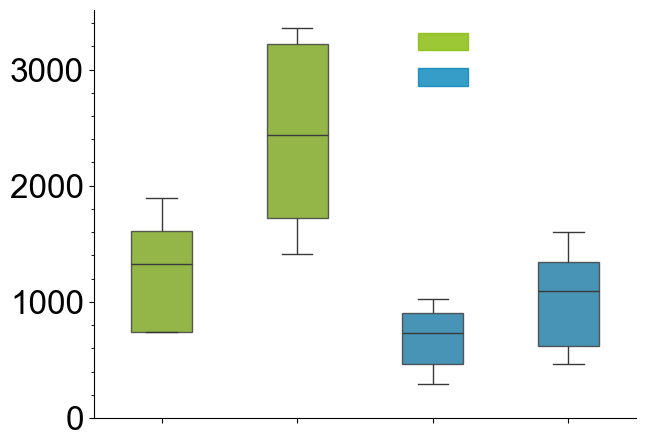

In [12]:
import seaborn as sns
import matplotlib.patches as mpatches

def plot_ysl_boxplot(yslaspdf):
    """
    Plot a boxplot of YSL actin intensity for different samples.

    Parameters:
    - yslaspdf (pandas.DataFrame): The input dataframe containing the data for the boxplot.

    Returns:
    None
    """
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(7, 5.3), sharey=True)

    # Set the plot configurations
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['font.size'] = 24
    plt.rcParams['savefig.dpi'] = 300
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')

    # Define the colors for the boxplot
    colors = ["#83bb03", "#83bb03", "#0383bb", "#0383bb"]

    # Create the boxplot
    ax = sns.boxplot(data=yslaspdf, x="Sampleid", y="Intensity", hue="Sampleid", legend="auto", palette=colors, width=0.45, boxprops=dict(alpha=.8))

    # Create the legend patches
    red_patch = mpatches.Patch(color="#83bb03", label='                  ', alpha=0.8)
    blue_patch = mpatches.Patch(color="#0383bb", label='                  ', alpha=0.8)

    # Set the x-axis tick labels
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels(["", "", "", ""])
    ax.set_yticks(np.arange(0,3600,200),minor=True)
    # Add the legend
    ax.legend(handles=[red_patch, blue_patch],frameon=False,fontsize=18)

    # Set the x and y axis labels
    plt.xlabel(None)
    plt.ylabel(None)
    plt.savefig("B:/home/PHD_data/Imaging_et_analysis/PaperFigures/Figure5/YSLintensity_k4k8mo.svg",transparent=True,bbox_inches='tight',dpi=300)
    plt.savefig("B:/home/PHD_data/Imaging_et_analysis/PaperFigures/Figure5/YSLintensity_k4k8mo.pdf",transparent=True,bbox_inches='tight',dpi=300)
    plt.savefig("B:/home/PHD_data/Imaging_et_analysis/PaperFigures/Figure5/YSLintensity_k4k8mo.png",transparent=True,bbox_inches='tight',dpi=300)
    
    # Show the plot
    plt.show()
plot_ysl_boxplot(yslaspdf)

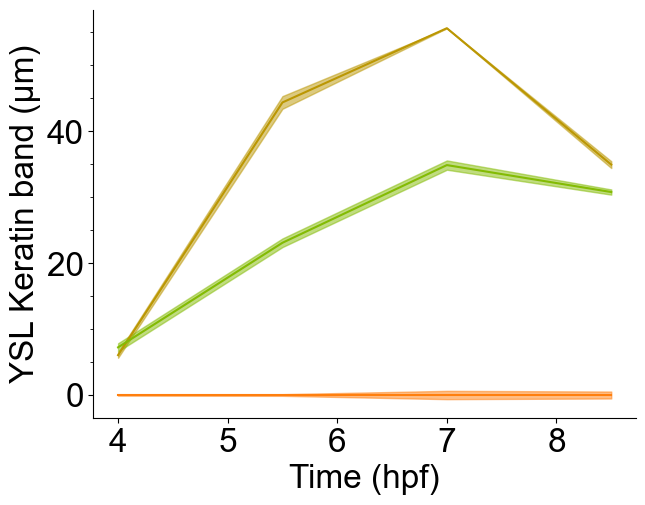

In [27]:
caRhoA=[6.05,44.37,55.63,34.94]
carhoastd=np.random.rand(1,4)[0]
control=[7.23,23.09,34.87,30.78]
controlstd=np.random.rand(1,4)[0]
mypt=[0.00,0.00,0.00,0.00]
myptstd=np.random.rand(1,4)[0]

#plotting the data as lineplot
fig, ax = plt.subplots(figsize=(7, 5.3))
# Set the plot configurations
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.yticks(np.arange(0,60,5),minor=True)

plt.ylabel("YSL Keratin band (μm)")
plt.xlabel("Time (hpf)")
plt.plot(np.arange(4,9,1.5),caRhoA,label="CA-RhoA",color="#BB9703")
plt.fill_between(np.arange(4,9,1.5),caRhoA-carhoastd,caRhoA+carhoastd,color="#BB9703",alpha=0.5)
plt.plot(np.arange(4,9,1.5),control,label="Control",color="#83bb03")
plt.fill_between(np.arange(4,9,1.5),control-controlstd,control+controlstd,color="#83bb03",alpha=0.5)
plt.plot(np.arange(4,9,1.5),mypt,label="Mypt1",color="#ff7f0e")
plt.fill_between(np.arange(4,9,1.5),mypt-myptstd,mypt+myptstd,color="#ff7f0e",alpha=0.5)
plt.savefig("B:/home/PHD_data/Imaging_et_analysis/PaperFigures/Figure5/YSLkeratinband.svg",transparent=True,bbox_inches='tight',dpi=300)
plt.savefig("B:/home/PHD_data/Imaging_et_analysis/PaperFigures/Figure5/YSLkeratinband.pdf",transparent=True,bbox_inches='tight',dpi=300)
plt.savefig("B:/home/PHD_data/Imaging_et_analysis/PaperFigures/Figure5/YSLkeratinband.png",transparent=True,bbox_inches='tight',dpi=300)

In [22]:
np.arange(4,9,1.5)

array([4. , 5.5, 7. , 8.5])